<a href="https://colab.research.google.com/github/anjali-mi/project/blob/main/Tiered_Project_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Tiered 1 | Titanic Dataset

Importing Necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, recall_score, roc_auc_score, precision_score, f1_score

(EDA)Exploratory Data Analysis

In [ ]:
# Data import
df = pd.read_csv('/content/titanic-dataset.csv')
df.head()

,3PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe() # statical overview like count-mean etc.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Findings**

PassengerId: Unique ID for each passenger, ranging from 1 to 891.

Survived: Survival status with a mean of 0.38, indicating 38.4% survival rate.

Pclass: Passenger class with a mean of 2.31, showing most passengers were in 3rd class.

Age: Average age of passengers is 29.7 years, with ages ranging from 0.42 to 80 years.

SibSp: Average number of siblings/spouses aboard is 0.52, with a maximum of 8.

Parch: Average number of parents/children aboard is 0.38, with a maximum of 6.

Fare: Average fare paid is 32.20 units, with fares ranging from 0 to 512.33 units.

In [ ]:
df.info()
print(df['Ticket'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


The Titanic dataset has 891 entries with 12 columns, including passenger details like ID, survival status, class, name, sex, age, siblings/spouses, parents/children, ticket number, fare, cabin, and embarkation point. Most columns have 891 non-null entries, except for 'Age' (714 non-null) and 'Cabin' (204 non-null). The 'Ticket' column shows the most common ticket numbers are 347082, CA. 2343, and 1601, each appearing 7 times, with 681 unique ticket numbers.

Check For Null Values of given datasets

3PassengerId      0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64


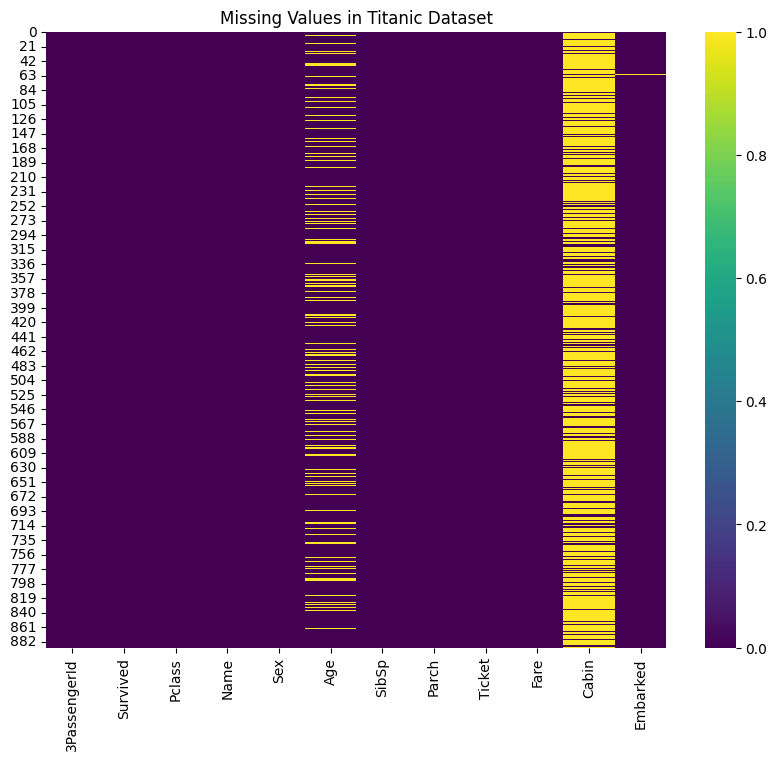

In [ ]:
print(df.isnull().sum())
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()


The Titanic dataset has missing values in the 'Age' (177 missing), 'Cabin' (687 missing), and 'Embarked' (2 missing) columns. The heatmap visualization highlights these missing values, with the 'Cabin' column having the most significant number of missing entries.


# Bar plots for Cartegorical data


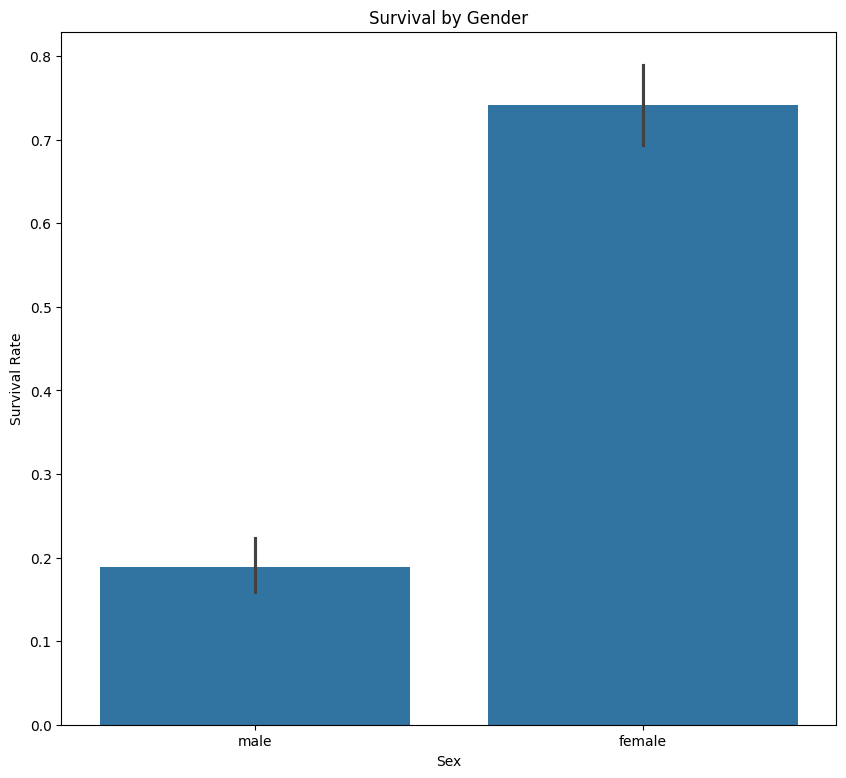

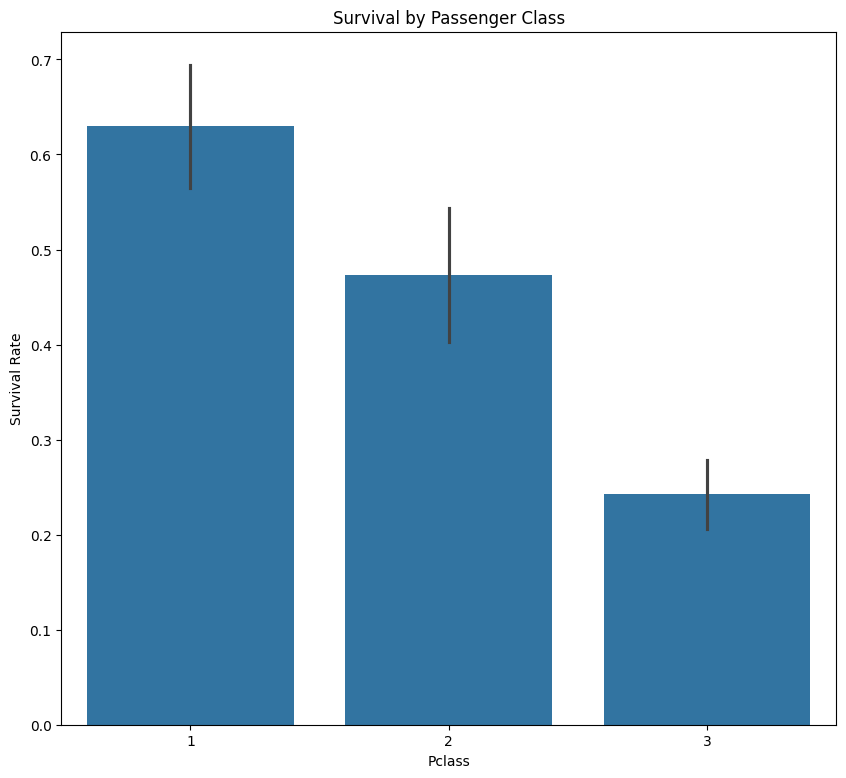

In [ ]:
# Bar Plot for survival by Gender/Sex
plt.figure(figsize=(10,9))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival by Gender')
plt.ylabel('Survival Rate')
plt.show()

#Bar Plot for survival by Class
plt.figure(figsize=(10,9))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


# Findings

The survival rate for females is significantly higher than for males.

Passengers in first class had the highest survival rate, followed by those in second class.

Third-class passengers had the lowest survival rate compared to the other classes

# **Histograms for given Datasets **

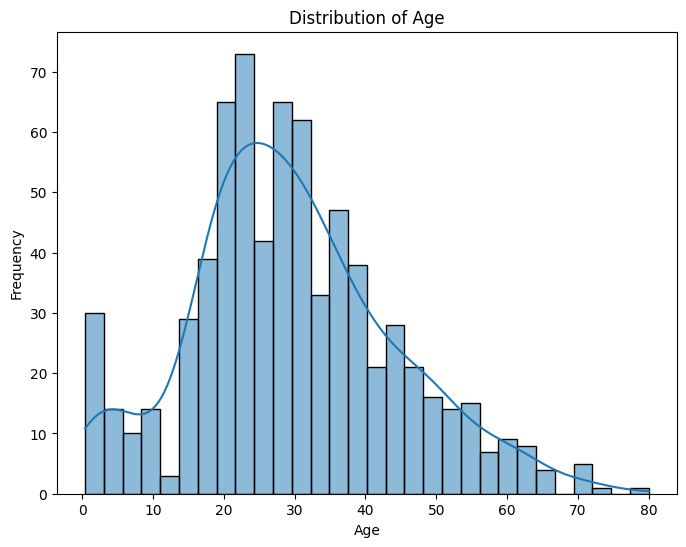

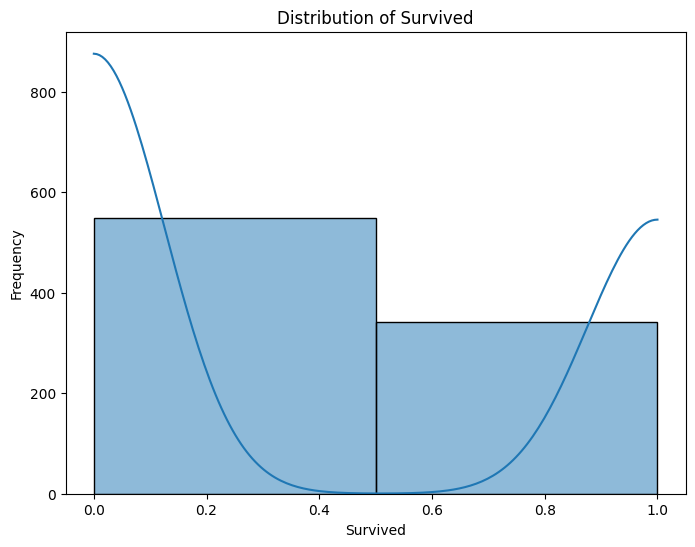

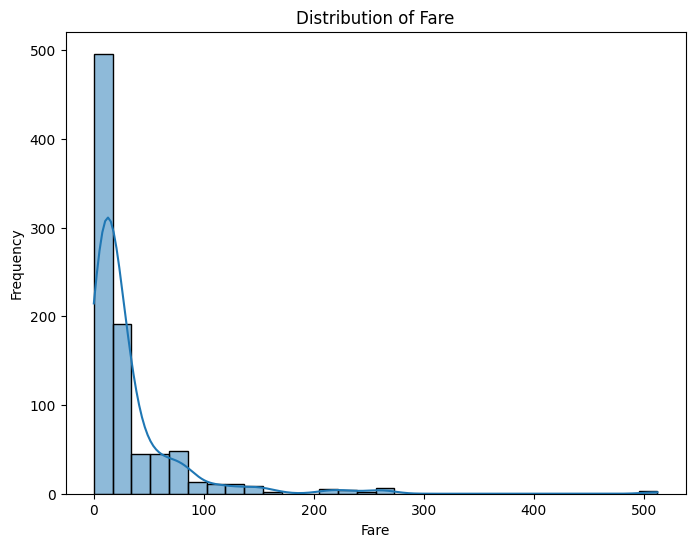

In [ ]:
#Histogram for Age
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#histogram for survived
plt.figure(figsize=(8,6))
sns.histplot(df['Survived'], bins=2, kde=True)
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

#Histogram for Fare
plt.figure(figsize=(8,6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


# Findings
The age distribution reveals a higher number of adults aged between 20 and 40, with fewer senior citizens and children. Interestingly, there are more children than senior citizens.

The survival distribution shows that comparatively fewer passengers survived the disaster.

The fare distribution indicates that most passengers paid lower fares, while fewer passengers paid higher fares.

# Pair Plots for Studying Relationships Between Features

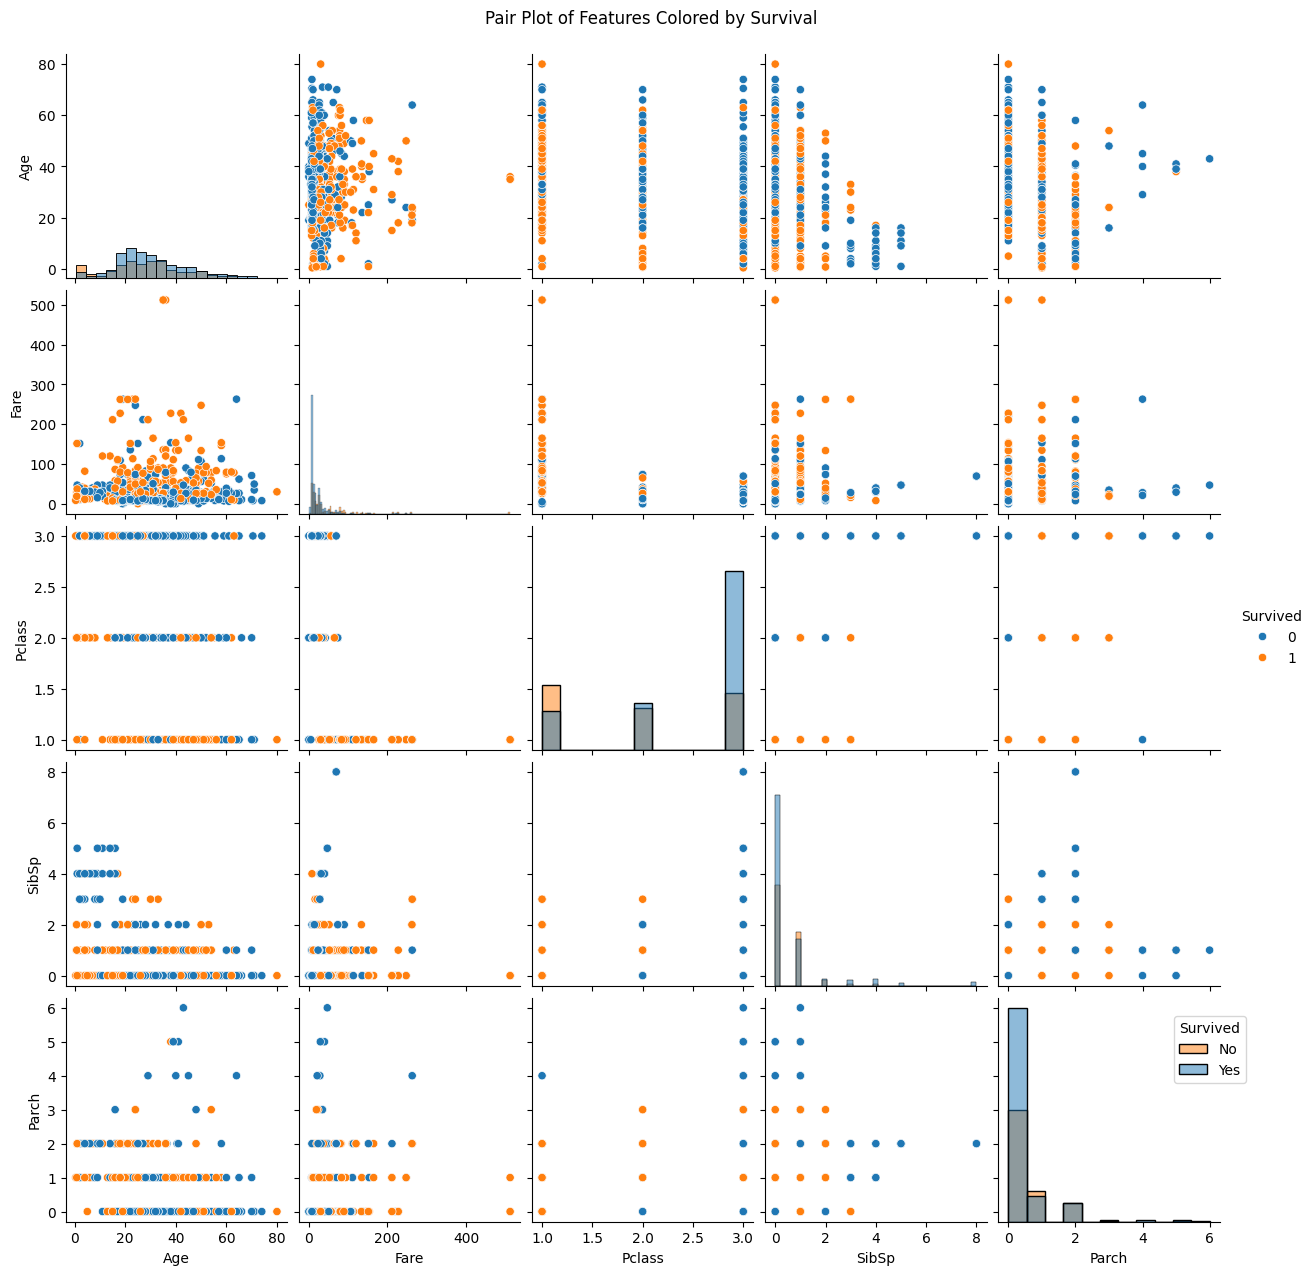

In [ ]:
# Selecting relevant columns for the pair plot
pairplot_data = df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]

# Creating pair plots
sns.pairplot(pairplot_data, hue='Survived', diag_kind='hist')
plt.suptitle('Pair Plot of Features Colored by Survival', y=1.02)
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right', bbox_to_anchor=(1.15, 0.95))
plt.show()


# Findings

Passenger Class (Pclass) and Survival: Passengers in 1st class (Pclass=1) had a higher survival rate, while those in 3rd class (Pclass=3) had a lower survival rate.

Fare and Survival: Higher fares were associated with a higher survival rate, with many survivors paying higher fares, often corresponding to 1st class.

Age and Survival: Younger passengers, especially children and young adults, had higher survival rates. Older passengers (ages 50+) had fewer survivors, although some older passengers in 1st class survived.

Family Size (SibSp and Parch) and Survival: Passengers with 1–2 siblings/spouses had a moderate survival rate, while those with 4+ siblings/spouses had low survival rates. Passengers with 1–3 parents/children aboard had a slightly better survival rate than those alone or with large family sizes.

Combined Effect of Class and Fare: 1st class passengers, who typically paid higher fares, had a significantly higher chance of survival, indicating that social class and economic status were major factors in survival.

# **Correlation Analysis**

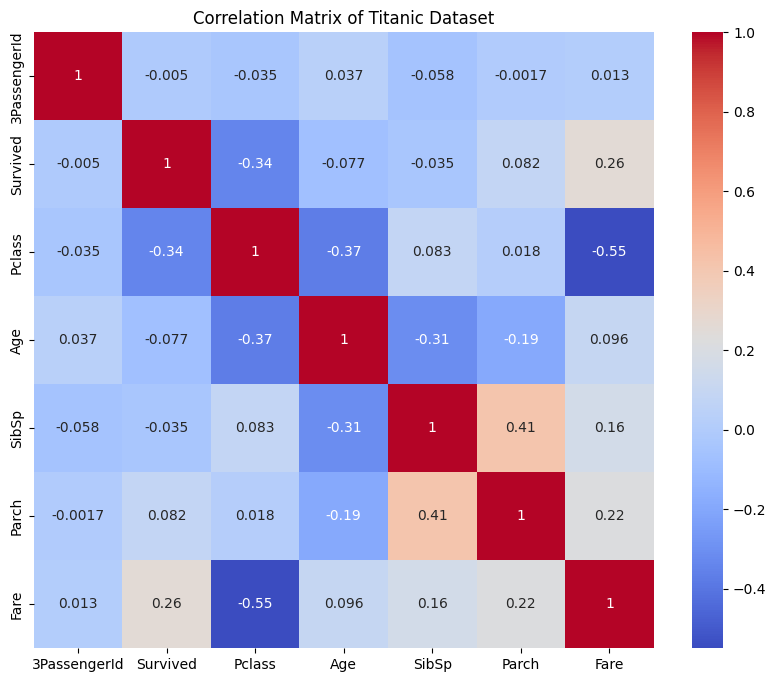

In [ ]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()



# Findings

Survived and Pclass: The correlation coefficient is approximately -0.34. This negative correlation indicates that passengers in higher classes (lower Pclass values) had a higher survival rate.

Survived and Fare: The correlation coefficient is around 0.26. This positive correlation suggests that passengers who paid higher fares were more likely to survive.

Survived and Age: The correlation coefficient is about -0.08. This weak negative correlation implies that younger passengers had a slightly higher chance of survival.

Pclass and Fare: The correlation coefficient is approximately -0.55. This strong negative correlation indicates that passengers in higher classes (lower Pclass values) paid higher fares.

Age and Pclass: The correlation coefficient is around -0.37. This negative correlation suggests that older passengers were more likely to be in lower classes.

SibSp and Parch: The correlation coefficient is about 0.41. This positive correlation indicates that passengers with more siblings/spouses aboard also tended to have more parents/children aboard.

# *Feature Engineering part *

**1. Create New Features**

In [ ]:
# Categorizing Passengers into Age Groups
# Define age groups
def categorize_age(age):
    if age < 18:
        return 'child'
    elif age < 60:
        return 'adult'
    else:
        return 'senior'

# Applying the function to create a new column
df['AgeGroup'] = df['Age'].apply(categorize_age)


Categorizing passengers into age groups (e.g., child, adult, senior) helps in analyzing survival rates across different age groups. This can reveal patterns such as whether children had a higher survival rate compared to adults and seniors.

**Calculateing Family Size**

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,3PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,1


Calculating family size by summing the number of siblings/spouses (SibSp) and parents/children (Parch) a passenger had aboard, plus one (the passenger themselves), helps understand the impact of family size on survival. Larger families might have different survival rates compared to individuals traveling alone.

**Extracting Titles from Passenger Names**

In [ ]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df.head()


,3PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,adult,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,adult,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,adult,1,Mr


Extracting titles (e.g., Mr., Mrs., Miss) from passenger names provides insights into the social status and gender of passengers, which might influence survival rates. Titles can help identify patterns such as whether certain titles had higher survival rates.

**Replacing Null value **

**Replace null**

In [ ]:
# Replace missing values for 'Age' using the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Replace missing values for 'Cabin' with a placeholder
df['Cabin'].fillna('Unknown', inplace=True)

# Replace values in 'Embarked' with the most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print(df.isnull().sum())


3PassengerId    0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
AgeGroup        0
FamilySize      0
Title           0
dtype: int64


<ipython-input-13-0e72b9b6a17d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-13-0e72b9b6a17d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

replace missing values in the Age column with the median age, fill missing values in the Cabin column with a placeholder like 'Unknown', and replace missing values in the Embarked column with the most frequent value (mode). This ensures that the dataset is complete and ready for analysis or modeling.

**Encoding Categorical Data:**


In [ ]:
def map_to_replace(columns):
    for col in columns:
        if(df[col].dtype == 'object' or df[col].dtype == 'category'):
            i = 0
            mapValue = {}
            for unique in df[col].unique():
                mapValue[unique] = i
                i+=1
            df[col] = df[col].map(mapValue)


map_to_replace(np.array(['Sex', 'Embarked', 'AgeGroup', 'Title']))
df.head()


,3PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,0,1,0


Converting categorical features (e.g., Sex, Embarked) into numerical format.

**3. Feature Selection**


**1. Correlation Analysis**

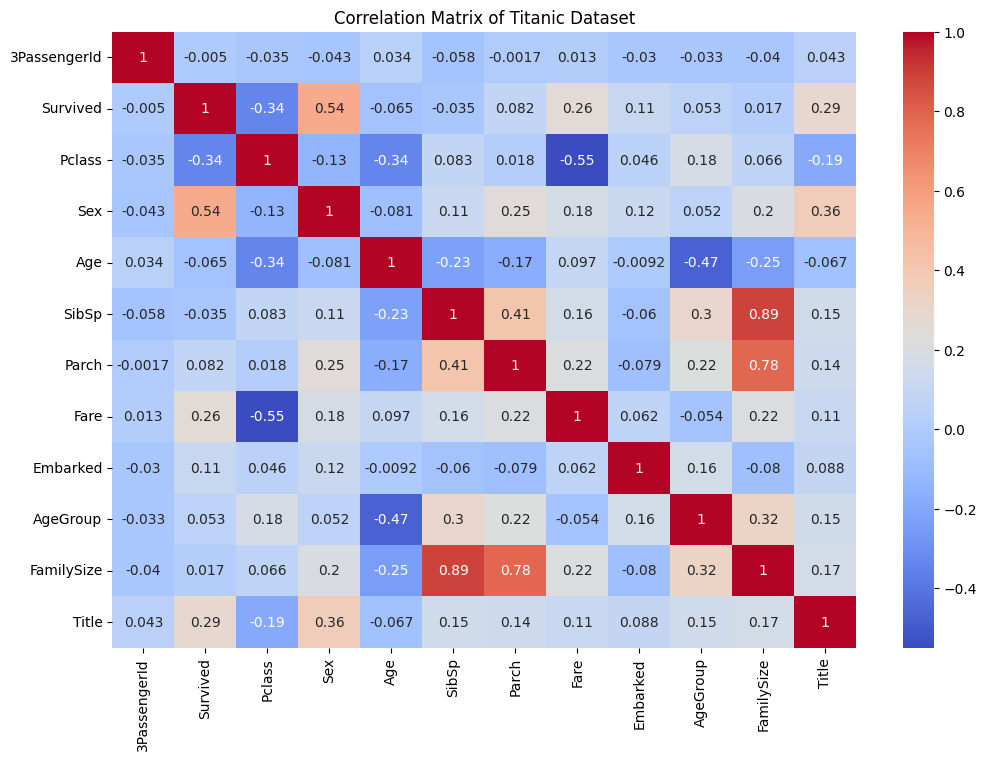

In [ ]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()



The correlation matrix helps identify relationships between different features in the Titanic dataset. Here are some key findings:

Survived and Pclass: The correlation coefficient is approximately -0.34. This negative correlation indicates that passengers in higher classes (lower Pclass values) had a higher survival rate.

Survived and Fare: The correlation coefficient is around 0.26. This positive correlation suggests that passengers who paid higher fares were more likely to survive.

Survived and Age: The correlation coefficient is about -0.08. This weak negative correlation implies that younger passengers had a slightly higher chance of survival.

Pclass and Fare: The correlation coefficient is approximately -0.55. This strong negative correlation indicates that passengers in higher classes (lower Pclass values) paid higher fares.

Age and Pclass: The correlation coefficient is around -0.37. This negative correlation suggests that older passengers were more likely to be in lower classes.

SibSp and Parch: The correlation coefficient is about 0.41. This positive correlation indicates that passengers with more siblings/spouses aboard also tended to have more parents/children aboard.

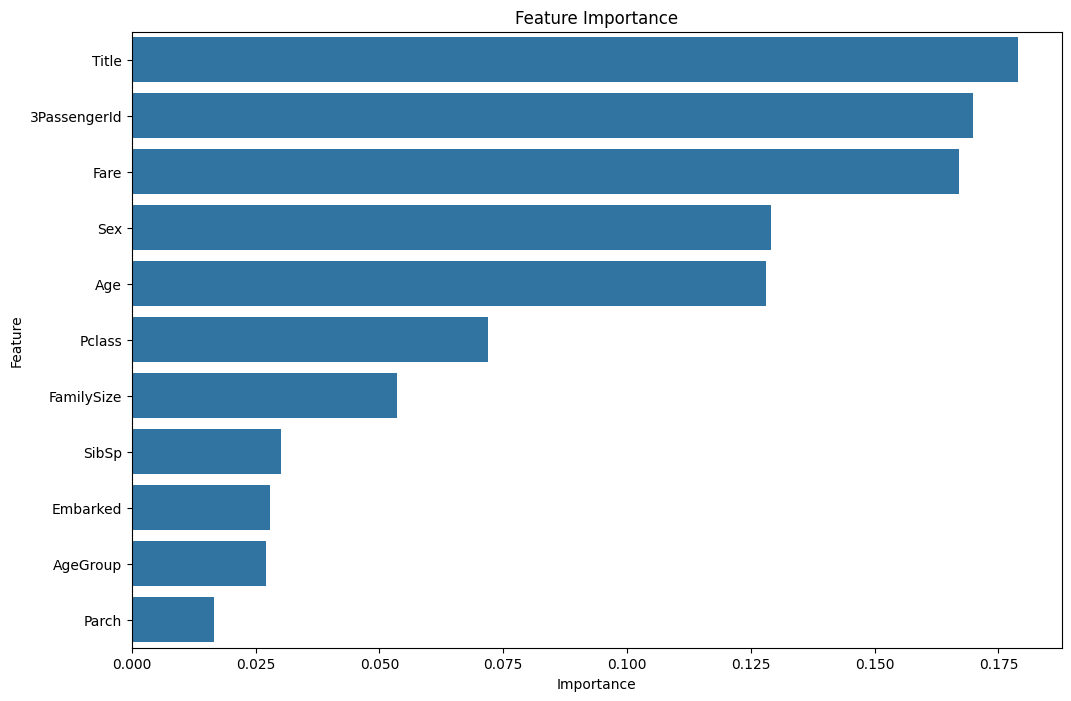

Low-importance features: []


In [ ]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])
X = df_numeric.drop(columns=['Survived'])
y = df['Survived']


# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Identify low-importance features (threshold < 0.01)
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < 0.01]['Feature'].tolist()
print("Low-importance features:", low_importance_features)



Using the Random Forest model to evaluate feature importance, we can identify which features contribute most to predicting survival:

Top Features: Features like Fare, Pclass, and Sex are among the most important for predicting survival. This aligns with the correlation analysis, where higher fares and higher classes (lower Pclass values) were associated with higher survival rates, and females had a higher survival rate than males.

Low-Importance Features: Features with low importance scores (e.g., below 0.01) can be considered for removal to simplify the model without significantly affecting its performance.

# **Predictive Modeling (Classification)**

# 1. Supervised Learning
**Supervised learning involves training models on labeled data to predict outcomes. In this case, we'll build models to predict the Survived column based on other features.**

# **2. Train Different Classification Models**

**Logistic Regression**

**Spliting the Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Define feature matrix (X) and target vector (y)
X = df_numeric.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Logistic Regression**

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(classification_report(y_test, y_pred_log_reg))



Logistic Regression Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 79.9% - The model correctly predicted the survival status of approximately 80% of the passengers.

Class 0 (Did not survive):

Precision: 0.81 - 81% of predicted non-survivors were correct.

Recall: 0.86 - 86% of actual non-survivors were correctly identified.

F1-Score: 0.83 - Balance between precision and recall.

Class 1 (Survived):

Precision: 0.78 - 78% of predicted survivors were correct.

Recall: 0.72 - 72% of actual survivors were correctly identified.

F1-Score: 0.75 - Balance between precision and recall.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = decision_tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree)}')
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Accuracy: 77.7% - The model correctly predicted the survival status of approximately 78% of the passengers.

Class 0 (Did not survive):

Precision: 0.82 - 82% of predicted non-survivors were correct.

Recall: 0.80 - 80% of actual non-survivors were correctly identified.

F1-Score: 0.81 - Balance between precision and recall.

Class 1 (Survived):

Precision: 0.72 - 72% of predicted survivors were correct.

Recall: 0.74 - 74% of actual survivors were correctly identified.

F1-Score: 0.73 - Balance between precision and recall.

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_forest = random_forest.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_forest)}')
print(classification_report(y_test, y_pred_forest))


Random Forest Accuracy: 0.8491620111731844
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



Accuracy: 84.9% - The model correctly predicted the survival status of approximately 85% of the passengers.

Class 0 (Did not survive):

Precision: 0.85 - 85% of predicted non-survivors were correct.

Recall: 0.90 - 90% of actual non-survivors were correctly identified.

F1-Score: 0.87 - Balance between precision and recall.

Class 1 (Survived):

Precision: 0.84 - 84% of predicted survivors were correct.

Recall: 0.78 - 78% of actual survivors were correctly identified.

F1-Score: 0.81 - Balance between precision and recall.

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)

# Predict and evaluate
y_pred_boost = grad_boost.predict(X_test)
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_boost)}')
print(classification_report(y_test, y_pred_boost))


Gradient Boosting Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



Accuracy: 81.6% - The model correctly predicted the survival status of approximately 82% of the passengers.

Class 0 (Did not survive):

Precision: 0.83 - 83% of predicted non-survivors were correct.

Recall: 0.87 - 87% of actual non-survivors were correctly identified.

F1-Score: 0.85 - Balance between precision and recall.

Class 1 (Survived):

Precision: 0.80 - 80% of predicted survivors were correct.

Recall: 0.74 - 74% of actual survivors were correctly identified.

F1-Score: 0.77 - Balance between precision and recall.


**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.5977653631284916
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179



Accuracy: 59.8% - The model correctly predicted the survival status of approximately 60% of the passengers.

Class 0 (Did not survive):

Precision: 0.60 - 60% of predicted non-survivors were correct.

Recall: 0.98 - 98% of actual non-survivors were correctly identified.

F1-Score: 0.74 - Balance between precision and recall.

Class 1 (Survived):

Precision: 0.67 - 67% of predicted survivors were correct.

Recall: 0.05 - 5% of actual survivors were correctly identified.

F1-Score: 0.10 - Balance between precision and recall.

**Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(random_forest, X, y, cv=5)
print(f'Random Forest Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')


Random Forest Cross-Validation Scores: [0.68715084 0.79775281 0.84269663 0.80898876 0.83146067]
Average Cross-Validation Score: 0.7936099428786643


The scores show the model's accuracy on different data subsets, indicating strong performance.

The average suggests the model is reliable and adapts well to new data, making it dependable for predicting survival on the Titanic.

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best parameters for Random Forest: {grid_search.best_params_}')
print(f'Best score for Random Forest: {grid_search.best_score_}')


Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.7106077021569979


The best parameters for the Random Forest model are:

Max Depth: 30

Min Samples Split: 10

Number of Estimators: 100

Best Score
Accuracy: 71.1%

# **6. Model Evaluation**

**With Metrics**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

X = df_numeric.drop(columns=['Survived'])
y = df_numeric['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict on test data
y_pred = random_forest.predict(X_test)
y_prob = random_forest.predict_proba(X_test)[:, 1]

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(classification_report(y_test, y_pred))





Accuracy: 0.7318435754189944
Precision: 0.6857142857142857
Recall: 0.6486486486486487
F1-Score: 0.6666666666666666
ROC AUC: 0.8144144144144145
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       105
           1       0.69      0.65      0.67        74

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



Accuracy: 73.2% - The model correctly predicted the survival status of approximately 73% of the passengers.

Precision: 0.69 - 69% of predicted survivors were correct.

Recall: 0.65 - 65% of actual survivors were correctly identified.

F1-Score: 0.67 - Balance between precision and recall.

**The ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve)**

ROC AUC: 0.8144144144144145


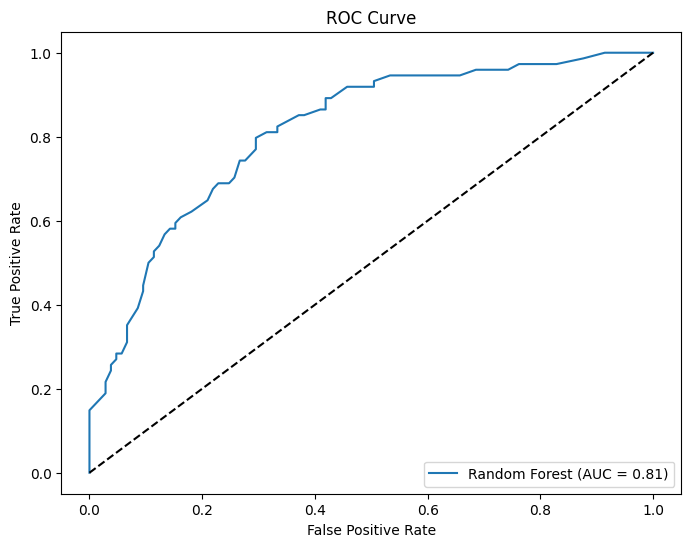

In [ ]:
# ROC Curve

roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



The ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are essential metrics for evaluating the performance of a classification model. ROC AUC: 0.81 - Indicates the model performs well in distinguishing between classes. The x-axis of the ROC curve represents the False Positive Rate (FPR), which is the proportion of negative instances incorrectly classified as positive. The y-axis represents the True Positive Rate (TPR), which is the proportion of positive instances correctly identified. The curve plots TPR against FPR at various threshold levels for the classifier. In this case, the AUC value for the classifier is 0.91, indicating a strong performance. AUC values range from 0.5, which signifies random guessing, to 1.0, indicating a perfect classifier. A value of 0.91 suggests that the model performs very well in distinguishing between classes. The ROC curve stays close to the top-left corner, signifying a high TPR and a low FPR. This means the classifier is effective at correctly identifying positive cases while minimizing false positives, highlighting its reliability for prediction.

# **Confusion matrix**

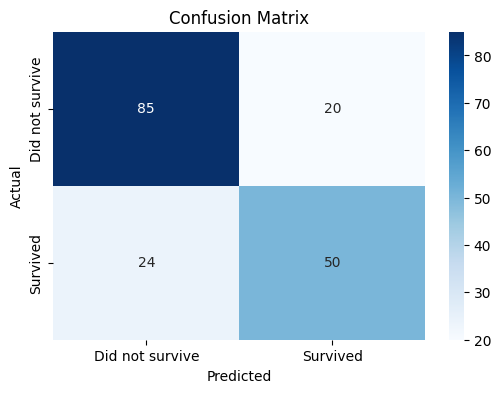

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix provides a detailed breakdown of the model's performance in predicting survival. Here's the interpretation:

True Negatives (TN): 85 instances where the model correctly predicted "Did not survive."

False Positives (FP): 20 instances where the model incorrectly predicted "Survived" when the actual outcome was "Did not survive."

False Negatives (FN): 24 instances where the model incorrectly predicted "Did not survive" when the actual outcome was "Survived."

True Positives (TP): 50 instances where the model correctly predicted "Survived."